In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tools.project_tools import *


2022-11-30 16:23:06.619376: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-30 16:23:06.736076: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-30 16:23:06.740536: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-30 16:23:06.740549: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

First, clean up the data set to make testing easier. Importantly, analysing data from too far in the past is not very applicable to today's markets, e.g. NYA in the 1960's. Further, some stock exchanges do not have data that far in the past, either due to lack of data or the exchange not existing. Thus to allow for cross comparison of exchanges we will normalise the data sets such that they all start in the 2000's.

In [2]:
df = pd.read_csv("indexProcessed.csv")
var = "2019-03-16"
df['Date'] = pd.to_datetime(df['Date'])
df = df[(df['Date'].dt.strftime('%Y-%m-%d')) >= var]
# df.drop(columns="Volume", inplace=True)
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
7948,HSI,2019-03-18,29112.43945,29409.00977,29034.13086,29409.00977,29409.00977,1.887811e+09,3823.171270
7949,HSI,2019-03-19,29419.14063,29486.15039,29319.50977,29466.27930,29466.27930,1.747657e+09,3830.616309
7950,HSI,2019-03-20,29357.18945,29435.81055,29251.25000,29320.97070,29320.97070,1.580528e+09,3811.726191
7951,HSI,2019-03-21,29387.75000,29446.76953,29051.84961,29071.56055,29071.56055,1.750673e+09,3779.302872
7952,HSI,2019-03-22,29173.33008,29243.09961,28847.33984,29113.35938,29113.35938,1.740699e+09,3784.736719
...,...,...,...,...,...,...,...,...,...
104219,J203.JO,2021-05-25,66054.92188,66812.45313,66022.97656,66076.67969,66076.67969,0.000000e+00,4625.367578
104220,J203.JO,2021-05-26,66076.67969,66446.36719,66030.35156,66108.22656,66108.22656,0.000000e+00,4627.575859
104221,J203.JO,2021-05-27,66108.22656,66940.25000,66102.54688,66940.25000,66940.25000,0.000000e+00,4685.817500
104222,J203.JO,2021-05-28,66940.25000,67726.56250,66794.60938,67554.85938,67554.85938,0.000000e+00,4728.840157


Split the main data set into sub sets for each exchange.

In [3]:
# list of all indexes
index_list = []

# create folder for splitting the original csv 
if not os.path.exists("data_by_index"): os.makedirs("data_by_index")
# split the original csv into index only
for (index), group in df.groupby('Index'):
     group.to_csv(f'data_by_index/{index}.csv', index=False)
     index_list.append({index})

# example csv split
pd.read_csv("data_by_index/NYA.csv").set_index("Date")

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Date,,,,,,,,
2019-03-18,NYA,12732.26953,12786.79004,12726.46973,12781.41016,12781.41016,3.552190e+09,12781.41016
2019-03-19,NYA,12826.12012,12854.82031,12728.96973,12760.79004,12760.79004,3.620220e+09,12760.79004
2019-03-20,NYA,12749.61035,12789.37988,12658.25977,12700.25000,12700.25000,3.771200e+09,12700.25000
2019-03-21,NYA,12658.96973,12803.45020,12657.62988,12782.54004,12782.54004,3.546800e+09,12782.54004
2019-03-22,NYA,12709.26953,12716.87012,12533.29004,12539.41016,12539.41016,4.237200e+09,12539.41016
...,...,...,...,...,...,...,...,...
2021-05-24,NYA,16375.00000,16508.51953,16375.00000,16464.68945,16464.68945,2.947400e+09,16464.68945
2021-05-25,NYA,16464.68945,16525.81055,16375.15039,16390.18945,16390.18945,3.420870e+09,16390.18945
2021-05-26,NYA,16390.18945,16466.33984,16388.32031,16451.96094,16451.96094,3.674490e+09,16451.96094


Since this projects concerns the relationship between Tokyo and NYC, we shall consider these two sets. We define the log return function and the return function to analyse if a particular day was "UP" or "DOWN".

In [4]:
nya_df = pd.read_csv("data_by_index/NYA.csv").set_index("Date")
tko_df = pd.read_csv("data_by_index/N225.csv").set_index("Date")

# insert log returns to each dataset
nya_df.insert(8, "Daily Log Returns", lg_return(nya_df)[0])
nya_df.insert(9, "Overall Forecast", lg_return(nya_df)[1])
tko_df.insert(8, "Daily Log Returns", lg_return(tko_df)[0])
tko_df.insert(9, "Overall Forecast", lg_return(tko_df)[1])


Finally, we shall even out the data frames such that they have the same dates, this will make combining the dataset easier.

In [5]:
even_out_frames(tko_df, nya_df)
tko_df

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Daily Log Returns,Overall Forecast
Date,,,,,,,,,,
2019-03-18,N225,21576.35938,21612.66992,21500.32031,21584.50000,21584.50000,55200000.0,215.845000,0.000377,1
2019-03-19,N225,21558.42969,21585.55078,21425.78906,21566.84961,21566.84961,59900000.0,215.668496,0.000390,1
2019-03-20,N225,21548.65039,21614.16992,21499.16016,21608.91992,21608.91992,65300000.0,216.089199,0.002793,1
2019-03-22,N225,21713.25977,21713.25977,21542.02930,21627.33984,21627.33984,78900000.0,216.273398,-0.003965,0
2019-03-25,N225,21267.41016,21275.42969,20911.57031,20977.10938,20977.10938,77700000.0,209.771094,-0.013744,0
...,...,...,...,...,...,...,...,...,...,...
2021-05-24,N225,28212.32031,28584.17969,28212.32031,28364.60938,28364.60938,54700000.0,283.646094,0.005383,1
2021-05-25,N225,28516.99023,28576.97070,28443.74023,28553.98047,28553.98047,54000000.0,285.539805,0.001296,1
2021-05-26,N225,28396.61914,28710.83008,28396.61914,28642.18945,28642.18945,64200000.0,286.421895,0.008611,1


We shall now add the relevant Tokyo data to the main New York data. Note that due to the timezone difference, Tokyo's Open is the next day for NYA. Thus we have to shift the Tokyo data by one before adding it to the nya dataset.  

In [6]:
tko_close = tko_df["Close"]

nya_df.insert(10, "Prev Tokyo Close", tko_close)


tko_df.drop(index=tko_df.index[0], inplace=True)

tko_open = tko_df["Open"]

tko_open_forecast = tko_df["Overall Forecast"]

tko_open_forecast =  np.append(tko_open_forecast,0)

tko_open = np.append(tko_open,0)

nya_df.insert(11, "Next Tokyo Open", tko_open)
nya_df.insert(12, "Next Tokyo Forecast", tko_open_forecast)
nya_df.drop(index=nya_df.index[len(nya_df) - 1], inplace=True)

Finally, we remove redundant columns and scale the remaining data down to allow for more efficient training.

In [7]:
min_max_scaler = MinMaxScaler()

Removed_Cols = ["Index", "CloseUSD", "Adj Close", "Daily Log Returns", "Overall Forecast", "Next Tokyo Forecast"]

scaled_data =  min_max_scaler.fit_transform(nya_df.drop(columns=Removed_Cols).values)

y_data = scaled_data[:, 6]
 
x_data = np.delete(scaled_data,  5, axis=1)

nya_train, nya_test, tko_open_train, tko_open_test = train_test_split(x_data,
                                                      y_data, 
                                                      test_size=0.20,
                                                      shuffle=False)

nya_train= np.reshape(nya_train, (nya_train.shape[0], nya_train.shape[1], 1))

scaled_data.shape

(514, 7)

In [9]:
predictions, model_history, prediction_error = evaluate(nya_train, tko_open_train, nya_test, tko_open_test, 
        "GRU", 10, 5, min_max_scaler)

Epoch 1/10
411/411 [==============================] - 2s 4ms/step - loss: 0.0070 - root_mean_squared_error: 0.0836 - val_loss: 7.6730e-04 - val_root_mean_squared_error: 0.0277
Epoch 2/10
411/411 [==============================] - 2s 4ms/step - loss: 3.2751e-04 - root_mean_squared_error: 0.0181 - val_loss: 2.3095e-04 - val_root_mean_squared_error: 0.0152
Epoch 3/10
411/411 [==============================] - 2s 4ms/step - loss: 4.3411e-05 - root_mean_squared_error: 0.0066 - val_loss: 1.1674e-04 - val_root_mean_squared_error: 0.0108
Epoch 4/10
411/411 [==============================] - 2s 4ms/step - loss: 1.8801e-05 - root_mean_squared_error: 0.0043 - val_loss: 9.3444e-05 - val_root_mean_squared_error: 0.0097
Epoch 5/10
411/411 [==============================] - 2s 4ms/step - loss: 1.6574e-05 - root_mean_squared_error: 0.0041 - val_loss: 3.2105e-05 - val_root_mean_squared_error: 0.0057
Epoch 6/10
411/411 [==============================] - 1s 4ms/step - loss: 9.3518e-06 - root_mean_squared

<AxesSubplot: >

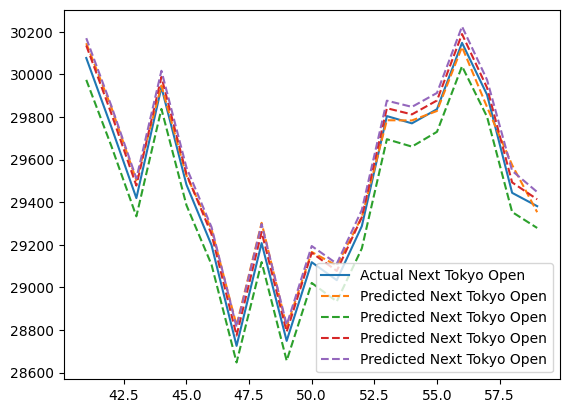

In [10]:
plot_dfs_in_range(40, 60, predictions)

In [ ]:
group_by_epoch(model_history=model_history, epoch=2)

{'loss': [[0.006056027486920357, 0.002768464619293809],
  [0.00012506693019531667, 1.7303123968304135e-05],
  [3.315197318443097e-05, 3.6280485801398754e-05],
  [5.3514821047428995e-05, 9.35588832362555e-06],
  [3.8447233237093315e-05, 1.146420618169941e-05]],
 'root_mean_squared_error': [[0.07782047986984253, 0.05261620134115219],
  [0.011183332651853561, 0.004159702453762293],
  [0.005757775157690048, 0.00602332828566432],
  [0.007315382361412048, 0.0030587397050112486],
  [0.0062005831860005856, 0.003385883290320635]],
 'val_loss': [[0.003695409744977951, 0.00227061053737998],
  [0.0011506539303809404, 1.4887131328578107e-05],
  [9.058260911842808e-05, 3.828527042060159e-05],
  [1.653044250815583e-06, 7.735595204394485e-07],
  [9.205764968100993e-07, 2.9480854209396057e-05]],
 'val_root_mean_squared_error': [[0.06078988313674927, 0.04765092208981514],
  [0.033921290189027786, 0.003858384443446994],
  [0.009517489932477474, 0.0061875092796981335],
  [0.001285707694478333, 0.000879522